# Potential conflicts in transatlantic flights #

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import conflict
import analysis
import os
import networkx as nx
import tools

In [2]:
# read in all data
inputFile = '../data/TrajDataV2_20120729.txt'
trajectories = pd.read_csv('%s.csv' % inputFile, index_col='flightIndex')

rawPointConflicts = {}
pointConflicts = {}
parallelConflicts = {}
flights2Conflicts = {}
reducedPointConflicts = {}
reducedParallelConflicts = {}
multiConflicts = {}

mindistance = 30.0
mintimes = range(1,181)
delays = [1, 2, 3]
dthresholds = [1, 2, 3]
maxDepartDelays = [10, 20, 30]


for mintime in mintimes:
    name = "mindist%05.1f_mintime%03i" % (mindistance, mintime)
    
    rawPointConflictFile = '%s.%s.rawPointConflicts.csv' % (inputFile, name)
    if os.path.exists(rawPointConflictFile):
        rawPointConflicts[mintime] = pd.read_csv(rawPointConflictFile, index_col='conflictIndex')
   
    multiConflictFile = '%s.%s.multiConflicts.csv' % (inputFile, name)
    if os.path.exists(multiConflictFile):
        multiConflicts[mintime] = pd.read_csv(multiConflictFile, index_col='multiConflictIndex')
        
    pointConflictFile = '%s.%s.pointConflicts.csv' % (inputFile, name)
    if os.path.exists(pointConflictFile):
        pointConflicts[mintime] = pd.read_csv(pointConflictFile, index_col='conflictIndex')
        
    parallelConflictFile = '%s.%s.parallelConflicts.csv' % (inputFile, name)
    if os.path.exists(parallelConflictFile):
        parallelConflicts[mintime] = pd.read_csv(parallelConflictFile, index_col='parallelConflict')
        
    for delay in delays:
        for dthreshold in dthresholds:
            for maxDepartDelay in maxDepartDelays:
                flights2ConflictsFile = "%s.%s.flights2Conflicts_delay%03i_thres%03i_depart%03i.h5" % (inputFile, name, delay, dthreshold, maxDepartDelay)
                reducedPointConflictFile = "%s.%s.reducedPointConflicts_delay%03i_thres%03i_depart%03i.csv" % (inputFile, name, delay, dthreshold, maxDepartDelay)
                reducedParallelConflictFile = "%s.%s.reducedParallelConflicts_delay%03i_thres%03i_depart%03i.csv" % (inputFile, name, delay, dthreshold, maxDepartDelay)
                multiConflictFile = "%s.%s.multiConflicts_delay%03i_thres%03i_depart%03i.csv" % (inputFile, name, delay, dthreshold, maxDepartDelay)
                key = (mintime, delay, dthreshold, maxDepartDelay)
                if os.path.exists(flights2ConflictsFile):
                    flights2Conflicts[key] = pd.read_hdf(flights2ConflictsFile, 'flights2Conflicts')
                if os.path.exists(reducedPointConflictFile):
                    reducedPointConflicts[key] = pd.read_csv(reducedPointConflictFile, index_col='conflictIndex')
                if os.path.exists(reducedParallelConflictFile):
                    reducedParallelConflicts[key] = pd.read_csv(reducedParallelConflictFile, index_col='parallelConflict')
                if os.path.exists(multiConflictFile):
                    multiConflicts[key] = pd.read_csv(multiConflictFile, index_col='multiConflictIndex')
        

In [6]:
%matplotlib inline

# Wind optimal trajectories #

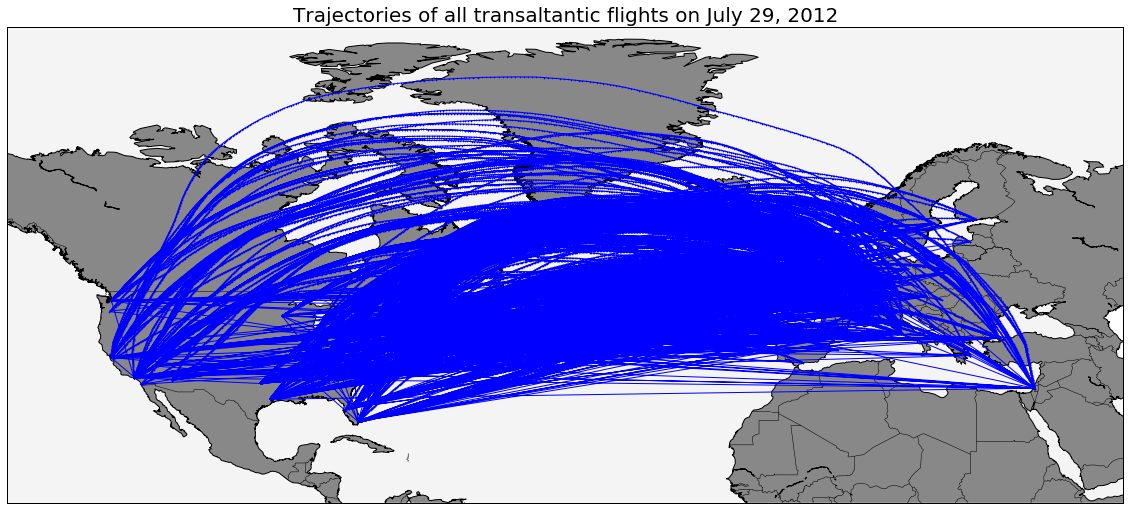

In [7]:
worldmap = analysis.prepareWorldMapPlot(llcrnrlon=-140, llcrnrlat=10, urcrnrlon=50, urcrnrlat=85)
analysis.addTrajectories(worldmap, trajectories)
plt.title('Trajectories of all transaltantic flights on July 29, 2012', fontsize=20);

# Spatial conflicts in wind optimal trajectories #

In [12]:
print "number of spatial conflicts:" ,len(rawPointConflicts[120])

number of spatial conflicts: 43251


In [4]:
worldmap = analysis.prepareWorldMapPlot(llcrnrlon=-140, llcrnrlat=10, urcrnrlon=50, urcrnrlat=85)
analysis.addPointConflicts(worldmap, rawPointConflicts[120])
plt.show()

# Categorize spatial conflicts #

In [17]:
print "Number of point conflicts:", len(pointConflicts[120])
print "Number of parallel conflicts:", len(parallelConflicts[120].index.unique())
print "Reduction of", 100- 100 * (len(pointConflicts[120]) + len(parallelConflicts[120].index.unique()))/ len(rawPointConflicts[60]), "%"

Number of point conflicts: 3573
Number of parallel conflicts: 2510
Reduction of 83 %


# After self consistent algorithm: Reduction of potential conflicts #

In [18]:
key = (120, 3, 3, 10)
print "Number of reduced point conflicts:", len(reducedPointConflicts[key])
print "Number of reduced parallel conflicts:", len(reducedParallelConflicts[key].index.unique())
print "Reduction w.r.t. before self-consistent algorithm", 100- 100 * (len(reducedPointConflicts[key]) + len(reducedParallelConflicts[key].index.unique()))/ (len(pointConflicts[120]) + len(parallelConflicts[120].index.unique())), "%"

Number of reduced point conflicts: 1436
Number of reduced parallel conflicts: 965
Reduction w.r.t. before self-consistent algorithm 61 %


# Reduction of potential conflicts #

In [25]:
for maxT in (60, 120, 180):
    key = (maxT, 3, 3, 10)
    NAfterMaxT = len(rawPointConflicts[maxT])
    NAfterCategorizing =  (len(pointConflicts[maxT]) + len(parallelConflicts[maxT].index.unique()))
    NAfterSelfConsAlgo = (len(reducedPointConflicts[key]) + len(reducedParallelConflicts[key].index.unique()))
    print "Number of potential conflicts by allowing for maximal difference in arrival times of", maxT, " minutes:", NAfterMaxT
    print "Number of potential conflicts after categorizing into point- and parallel conflicts:", NAfterCategorizing
    print "Number of potential conflicts after self-consisten algorithm:", NAfterSelfConsAlgo

Number of potential conflicts by allowing for maximal difference in arrival times of 60  minutes: 33878
Number of potential conflicts after categorizing into point- and parallel conflicts: 4168
Number of potential conflicts after self-consisten algorithm: 2207
Number of potential conflicts by allowing for maximal difference in arrival times of 120  minutes: 43251
Number of potential conflicts after categorizing into point- and parallel conflicts: 6083
Number of potential conflicts after self-consisten algorithm: 2401
Number of potential conflicts by allowing for maximal difference in arrival times of 180  minutes: 43251
Number of potential conflicts after categorizing into point- and parallel conflicts: 6083
Number of potential conflicts after self-consisten algorithm: 2401


In [57]:
ax.hist?

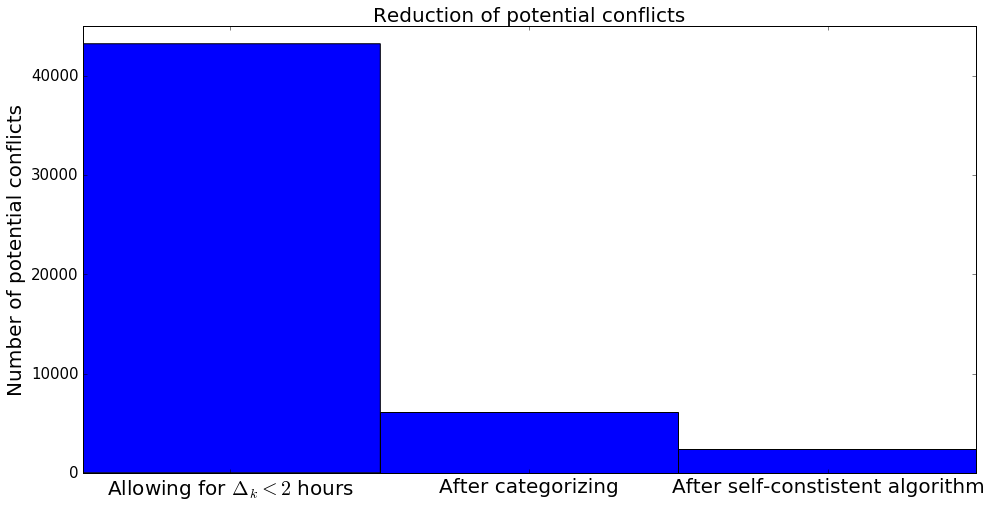

In [116]:
fig = plt.figure(figsize=(16,8))
ax =fig.add_subplot(1, 1, 1)
data = np.concatenate((np.ones(int(NAfterMaxT)), 2*np.ones(int(NAfterCategorizing))))
data = np.concatenate((data, 3*np.ones(int(NAfterSelfConsAlgo))))
ax.hist(data, bins=3)
ax.set_xlim(1,3)
ax.set_xticks((1.33, 2, 2.67))
ax.set_xticklabels(('Allowing for $\Delta_k<2$ hours', 'After categorizing', 'After self-constistent algorithm'), fontsize=20);
ax.set_title('Reduction of potential conflicts', fontsize=20)
ax.set_ylabel('Number of potential conflicts', fontsize=20);
ax.set_yticks((0, 10000, 20000, 30000, 40000))
ax.set_yticklabels((0, 10000, 20000, 30000, 40000), fontsize=15);#

# Subsets of the data #

In [3]:
G = analysis.getConflictGraph(reducedPointConflicts[(120,3,3,10)], reducedParallelConflicts[(120,3,3,10)])
plt.figure(figsize=(16,10))
plt.xticks([])
plt.yticks([])
#plt.title("Topological display of the potential conflicts between flights", fontsize=25)
analysis.plotGraph(G, connectedComponents=True)
plt.show()

# Subsets of the data #

In [9]:
G = analysis.getConflictGraph(reducedPointConflicts[(120,3,3,10)], reducedParallelConflicts[(120,3,3,10)])
plt.figure(figsize=(16,10))
plt.xticks([])
plt.yticks([])
#plt.ylim(1.4, 2.8)
#plt.xlim(9.3, 10.7)
plt.title("Topological display of the potential conflicts between flights (Subset)", fontsize=25)
analysis.plotGraph(G, connectedComponents=True)
plt.show()